In [1]:
%load_ext autoreload
%autoreload 2

In [28]:
import os
import time
from dataclasses import dataclass

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import spotipy
from dotenv import load_dotenv
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from spotipy.oauth2 import SpotifyClientCredentials

from music_analysis import REPO_ROOT

# 日本語フォントの設定
mpl.rcParams["font.family"] = "Hiragino Sans"

load_dotenv(REPO_ROOT / ".env")

True

In [6]:
from music_analysis.preprocess.retrieve import TrackRetriever
from music_analysis.preprocess.tables import TrackInfoTable

In [7]:
client_credentials_manager = SpotifyClientCredentials(
    os.environ["SPOTIPY_CLIENT_ID"], os.environ["SPOTIPY_CLIENT_SECRET"]
)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [20]:
@dataclass
class PlayList:
    name: str
    id: str


pl_ids = [
    "37i9dQZF1DXdYLx5nkfC6h",  # 1990
    "37i9dQZF1DXe7O2FbHCVV7",  # 1995
    "37i9dQZF1DXbfiVy8TtVAi",  # 2000
    "37i9dQZF1DWTJ4WvMdD3FU",  # 2005
    "37i9dQZF1DX3sNFTJOmXxv",  # 2010
    "37i9dQZF1DWTMk3G0nyzbA",  # 2015
]
pl_names = ["1990", "1995", "2000", "2005", "2010", "2015"]
for name, id in zip(pl_names, pl_ids):
    play_list = PlayList(name=name, id=id)

In [22]:
track_retriever = TrackRetriever(sp)

track_info_df = []
for name, id in zip(pl_names, pl_ids):
    pl = PlayList(name=name, id=id)
    pl_trks = track_retriever.glob_playlist_tracks(pl.id)

    track_info_table = TrackInfoTable(sp=sp, tracks=pl_trks)
    df = track_info_table.get_track_info_df()
    df["年代"] = pl.name
    print(len(df))
    track_info_df.append(df)

track_info_df = pd.concat(track_info_df)
track_info_df

2024-03-19 12:02:30 - music_analysis.preprocess.retrieve - INFO - retrieve:92 - This playlist inclues 99 tracks
99
2024-03-19 12:02:31 - music_analysis.preprocess.retrieve - INFO - retrieve:92 - This playlist inclues 98 tracks
98
2024-03-19 12:02:32 - music_analysis.preprocess.retrieve - INFO - retrieve:92 - This playlist inclues 98 tracks
98
2024-03-19 12:02:33 - music_analysis.preprocess.retrieve - INFO - retrieve:92 - This playlist inclues 98 tracks
98
2024-03-19 12:02:35 - music_analysis.preprocess.retrieve - INFO - retrieve:92 - This playlist inclues 99 tracks
99
2024-03-19 12:02:36 - music_analysis.preprocess.retrieve - INFO - retrieve:92 - This playlist inclues 99 tracks
99


,トラックID,アーティストID,アルバムID,トラック名,アーティスト名,アルバム名,アルバム種別,リリース日,リリース日の精度,人気度,...,speechiness,acousticness,instrumentalness,liveness,valence,拍子,キー,長短長,曲長[s],年代
0,5kdfBuQRbMUhQ6zATCFoTm,7lVG50DbbnbI4i1DgLxrLk,5mmIzGXrK9bwirdfSfPTqB,さよなら人類 ～シングルヴァージョン～,Tama,まちあわせ ベストアルバム,album,2009-03-04,day,34,...,0.035,0.295,0.0,0.0989,0.632,4,C,Major,280.160004,1990
1,4lPEdvGVptFXUMk8DKMLnF,5lTGqFmlTng9jPrs7c2dRA,2AIZoi7Zgw4IJimdZvTVRd,浪漫飛行,Kome Kome Club,KOMEGUNY,album,1987-01-01,year,59,...,0.0312,0.117,0.00515,0.145,0.969,4,B,Major,246.839996,1990
2,0VautPaGJuzwHMo945JvLa,7i9bNUSGORP5MIgrii3cJc,349qpNnHWWjueoSXQqjXJJ,太陽のKomachi Angel,B'z,太陽のKomachi Angel,single,1990-06-13,day,49,...,0.0404,0.000219,0.000002,0.135,0.79,4,G,Major,249.272995,1990
3,5Nc3OwtzaQdeyEFMb31YCW,1fwyrDSLYLNCWHRv3Siyd7,2QOZZX4ry5jRenZLprreQK,今すぐＫｉｓｓ Ｍｅ,LINDBERG,ＬＩＮＤＢＥＲＧ ＩＩＩ,album,2016-05-18,day,28,...,0.0496,0.013,0.0,0.113,0.918,4,E,Major,237.039993,1990
4,4GAAXyEODRSDdtLHwe6A5s,2fpbR8VQWHUivTaeLTR5MJ,5PNLfyJBUcZFuV3GQUExbf,OH YEAH !,PRINCESS PRINCESS,The Greatest Princess,album,1988-01-01,year,37,...,0.0459,0.0759,0.0,0.08,0.582,4,A,Major,249.106995,1990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,1FV0rV6GEDsQd3sM8risYX,6nS5roXSAGhTGr34W6n7Et,24VA5YQ9PiDb5L3ZkoIj04,Holding On - Radio Edit,Disclosure,Holding On (Radio Edit),single,2015-07-05,day,33,...,0.212,0.114,0.000124,0.135,0.854,4,D,Minor,211.080002,2015
95,1KcnJTiXJXAqW5bB7zpkBC,4D75GcNG95ebPtNvoNVXhz,0MRRBtUQH6706AqLBYHkZI,SummerThing!,AFROJACK,SummerThing!,single,2015-06-21,day,48,...,0.0613,0.0541,0.0,0.297,0.79,4,C,Major,235.343994,2015
96,2vzn8usBcuNL93DnTjEK0z,4Kxlr1PRlDKEB0ekOCyHgX,2SPrl8C8pgSM5gXbAiyJHY,LOSER,BIGBANG,MADE,album,2016-12-13,day,62,...,0.107,0.338,0.0,0.356,0.488,4,D♯/E♭,Major,219.371002,2015
97,5CchV8Rh5s2sJ377bUP52Y,0bAsR2unSRpn6BQPEnNlZm,284IHmODFtKRCwM3WRnwOW,Brave Shine,Aimer,Brave Shine,single,2015-06-03,day,34,...,0.0828,0.000711,0.000003,0.173,0.525,4,G♯/A♭,Major,233.973007,2015


<Axes: xlabel='年代'>

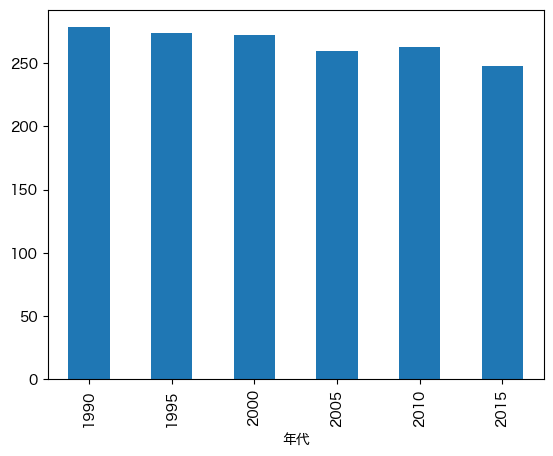

In [23]:
track_info_df.groupby("年代")["曲長[s]"].mean().plot.bar()

In [50]:
cols = [
    "曲長[s]",
    "平均ラウドネス[dB]",
    "テンポ(BPM)",
    "拍子",
    # "キー",
    "長短長",
    "danceability",
    "energy",
    "speechiness",
    "acousticness",
    "instrumentalness",
    "liveness",
    "valence",
]

In [51]:
X = pd.get_dummies(track_info_df[cols], drop_first=True).values

scaler = StandardScaler()
scaler.fit(X)
X_scaler = scaler.transform(X)

# X_reduced = PCA(n_components=2).fit_transform(X_scaler)
X_reduced = TSNE(n_components=2).fit_transform(X_scaler)

feat_df = pd.DataFrame(X_reduced, columns=["第一主成分", "第二主成分"])
feat_df["アルバム名"] = track_info_df["アルバム名"].values
feat_df["トラック名"] = track_info_df["トラック名"].values
feat_df["曲長[s]"] = track_info_df["曲長[s]"].values
print(feat_df.shape)

(591, 5)


In [52]:
feat_df["年代"] = track_info_df["年代"].values
feat_df["アーティスト名"] = track_info_df["アーティスト名"].values
feat_df["トラック名"] = track_info_df["トラック名"].values
feat_df

,第一主成分,第二主成分,アルバム名,トラック名,曲長[s],年代,アーティスト名
0,14.559705,-1.193267,まちあわせ ベストアルバム,さよなら人類 ～シングルヴァージョン～,280.160004,1990,Tama
1,0.433504,-9.339297,KOMEGUNY,浪漫飛行,246.839996,1990,Kome Kome Club
2,0.500212,9.037671,太陽のKomachi Angel,太陽のKomachi Angel,249.272995,1990,B'z
3,9.075654,-0.235745,ＬＩＮＤＢＥＲＧ ＩＩＩ,今すぐＫｉｓｓ Ｍｅ,237.039993,1990,LINDBERG
4,2.858462,8.974185,The Greatest Princess,OH YEAH !,249.106995,1990,PRINCESS PRINCESS
...,...,...,...,...,...,...,...
586,-12.735057,-6.571206,Holding On (Radio Edit),Holding On - Radio Edit,211.080002,2015,Disclosure
587,-8.427649,8.301356,SummerThing!,SummerThing!,235.343994,2015,AFROJACK
588,-12.671720,8.892474,MADE,LOSER,219.371002,2015,BIGBANG
589,11.642724,18.330189,Brave Shine,Brave Shine,233.973007,2015,Aimer


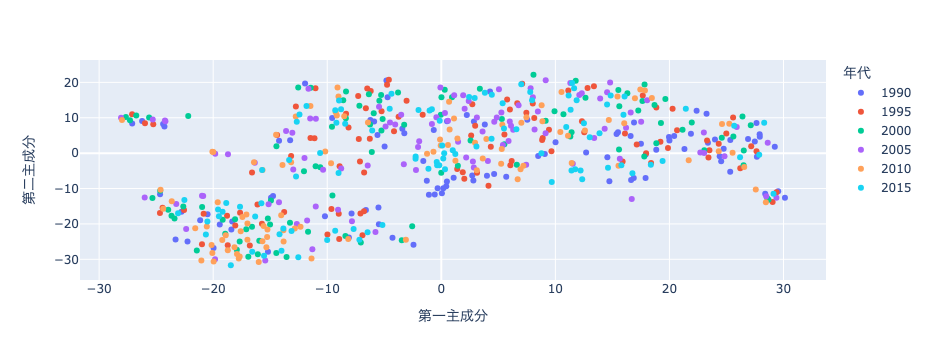

In [53]:
px.scatter(
    feat_df,
    x="第一主成分",
    y="第二主成分",
    hover_name="アーティスト名",
    hover_data=["アーティスト名", "トラック名", "年代"],
    color="年代",
)